# Hands-on: Data Visualization with `matplotlib`

This hands-on will allow you to practice reading in and exploring data, as well as using basic visualization to easily see the distribution, patterns and trends and other interesting things that might arise from the dataset.

The main library to be used will be `matplotlib`. We'll cover the basic plotting functions first then proceed with exploring the dataset and applying the concepts from the lecture. 

`matplotlib can` be used in "interactive" mode through Jupyter notebooks. To activate this function, simply include the line `%matplotlib inline` in your notebook followed by an import of `pyplot` from `matplotlib`.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

%matplotlib inline

Before we get into learning some stuff, lets set up the `style` of our plots. Starting from Matplotlib v1.5, you have many different plotting `styles` to chose from. To get all the list of supported ones, run 
```ipython
plt.style.available
```

Or check out the gallery [here](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

To be able to change the `style` that Matplotlib comes with for all of your plots, simply call

```ipython
plt.style.use('seaborn-darkgrid')
```

In [2]:
plt.style.use('seaborn-darkgrid')

## Parts of a Plot (in `matplotlib`)

### 01. Figures

All plotting are done through the `Figure` object. They serve as the _canvas_ of your plot. You can create as many figures as you need but a `Figure` is mandatory for any plotting to happen.

#### Figure Properties
- ##### figsize : 
tuple of integers, width, height in inches.   
- ##### dpi : 
integer, resolution of the figure in dots per inch.

[]

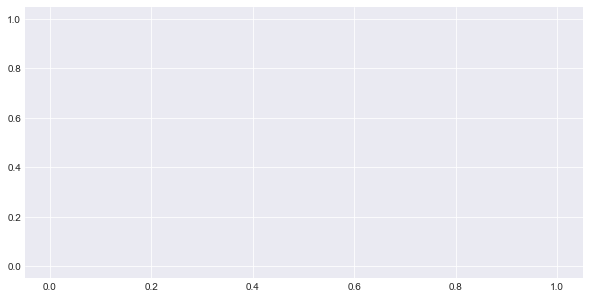

In [3]:
fig = plt.figure(figsize=(10, 5))

# To plot, we just call plot()
plt.plot()

You may also save the figure generated using the function `plt.savefig(<file_name>)`. The default format saved is `png`. There are many other formats supported. To get a list of all the formats, you can use this function: `fig.canvas.get_supported_filetypes()`

### 02. Axes

We can see from above that `matplotlib` automatically creates the axes for us in a figure. An `Axes` object contains [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects (and many other things) and it belongs to just one `Figure`. 

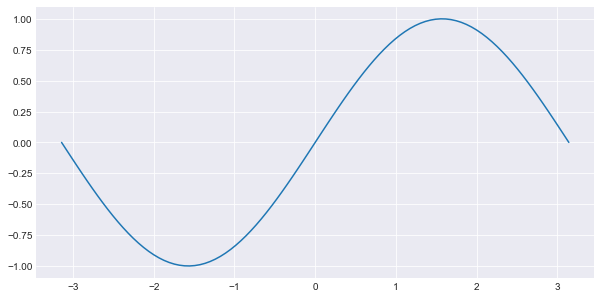

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta))

```ipython
fig.add_subplot(numrows numcols fignum)
```
> `fignum` ranges from 1 to numrows*numcols.

> Each figure can have as many axes and subplots as needed. See the [`Figure` class documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html) for more details.

If you want to place an axes manually, i.e., not on a rectangular grid, use the [`axes()` command](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axes.html).

### 03. Limits and Autoscaling

Looking at the plot above, we see that the axes only show the values from the data. By default, `matplotlib` will attempt to determine limits that encompasses all the data provided.  This is the **autoscale** feature. 

To set the limit we can call `set_xlim([lower_bound, upper_bound])` and `set_ylim([lower_bound, upper_bound])` from the `Axes` object.

(-3.141592653589793, 1.5707963267948966)

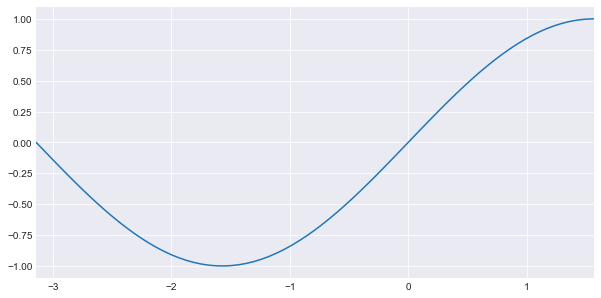

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta))

# Set the limit to the x values
ax.set_xlim([-np.pi, np.pi/2])

### 04. Labels and Legends

You can provide a label to your data series that will allow `matplotlib` to automatically build the legend for the plot. `x` and `y` axes may also be labeled using `set_xlabel()` and `set_ylabel()`. A title may also be provided to the subplot through the `set_title()` function.

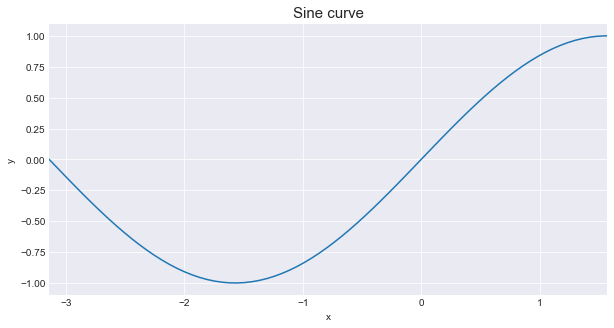

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta), label='Some data')

# Set the limit to the x values
ax.set_xlim([-np.pi, np.pi/2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine curve", fontsize=15);

## Exercise

Now, let's try working on a dataset and see how we can apply the data processing methods and visualization methods above to this dataset.

The Kaggle Titanic Dataset may be found here: https://www.kaggle.com/c/titanic/data

You would need to login to Kaggle to download the data.

In [7]:
titanic = pd.read_csv('titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

As taken from Kaggle: 

| Variable  | Definition                               | Key                                            |
| --------- | ---------------------------------------- | ---------------------------------------------- |
| survival  | Survival                                 | 0 = No, 1 = Yes                                |
| pclass    | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex       | Sex                                      |                                                |
| Age       | Age in years                             |                                                |
| sibsp     | # of siblings/spouses aboard the Titanic |                                                |
| parch     | # of parents/children aboard the Titanic |                                                |
| ticket    | Ticket number                            |                                                |
| fare      | Passenger fare                           |                                                |
| cabin     | Cabin number                             |                                                |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

### Let's begin exploring the data...

* How many rows and columns do we have? 
* What is the data type of each column? 
* What is the most common value? Mean? Standard deviation?
* Are there any missing values?
* How do you want to handle the missing values? Remove them? Replace with an arbitrary value?

In [9]:
# your code here

### Visualizations

In the next section, we'll try to visualize the data so that we can see it better. Since we have over 800 observations, using charts will help us "see" better.

Also, based on our knowledge of what happened in Titanic, let's see if the data and our pre-existing knowledge are aligned.

#### Verification Checklist

1. There were a lot of people who died from the Titanic. **How many died and how many survived?**
2. While evacuating the ship, they prioritized women and children, and also some elderly people. To confirm these, we ask the following:
    - What is the distrubution of the ages of the people onboard the Titanic?
    - Compare the distribution of the ages of the people who survived and those who died. Can you see a difference in the distribution?
    - How many men and women were aboard the Titanic?
    - How many of the men and how many of the women survived and died?
3. One thing depicted in the movies was the wealthy passengers were also prioritized during the evacuation of the ship. Can we also confirm this by looking at the number of people per passenger class that survived against those who died?

#### How many people survived? How many did not?

In [8]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

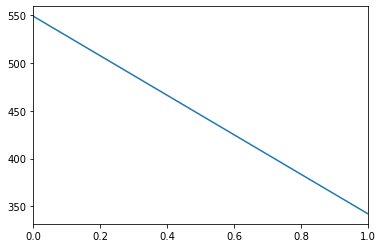

In [19]:
titanic['Survived'].value_counts().plot()

Text(0.5, 1.0, 'BLAH')

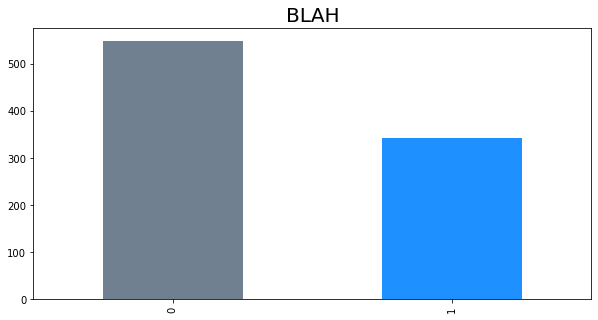

In [18]:
ax = titanic['Survived'].value_counts().plot(kind='bar', figsize=(10, 5), color=['slategray', 'dodgerblue'])

ax.set_title("yeet", fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=12)

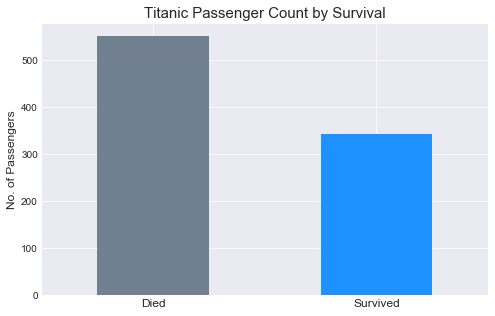

In [10]:
ax = titanic['Survived'].value_counts().plot(figsize=(8, 5), kind='bar', color=['slategray', 'dodgerblue'], width=0.5)

ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=12)
ax.set_title('Titanic Passenger Count by Survival', fontsize=15)
ax.set_ylabel('No. of Passengers', fontsize=12);

#### What is the distribution of the age of the passengers?

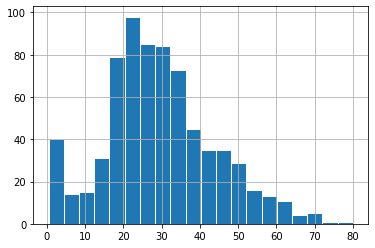

In [22]:
titanic['Age'].hist(bins=20, edgecolor='w')

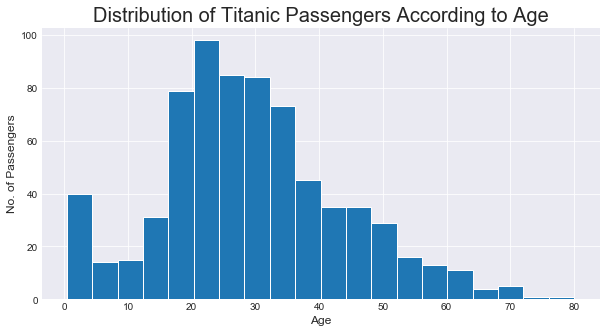

In [11]:
ax = titanic['Age'].hist(bins=20, edgecolor='w', figsize=(10, 5))

ax.set_title('Distribution of Titanic Passengers According to Age', fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('No. of Passengers', fontsize=12);

Try adding the `mean` and `median` of the age distribution using 

```ipython
ax.axvline(x=value)
```

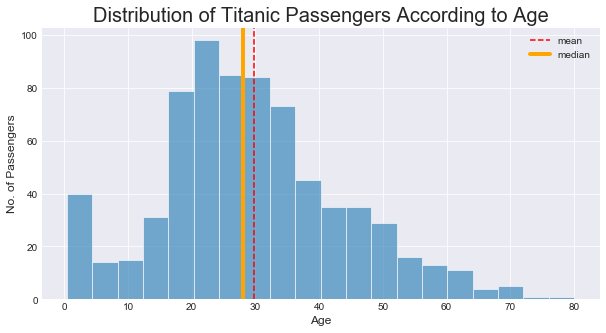

In [12]:
# your code here

ax = titanic['Age'].hist(bins=20, edgecolor='w', figsize=(10, 5), alpha=0.6)

ax.set_title('Distribution of Titanic Passengers According to Age', fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('No. of Passengers', fontsize=12)
ax.axvline(x=titanic['Age'].mean(), color='red', ls='--', label='mean')
ax.axvline(x=titanic['Age'].median(), color='orange', lw=4, label='median')
ax.legend();

## Exploratory Analysis

The previous questions were concerned with just one variable. Let's try to visualize the data with more than just one variable.

#### What is the distribution of the age of those who survived and those who didn't? 

From the comparative visualization of the two distributions, can you spot a difference?

In [24]:
survived = titanic.loc[titanic['Survived'] == 1]
died = titanic.loc[titanic['Survived'] == 0]

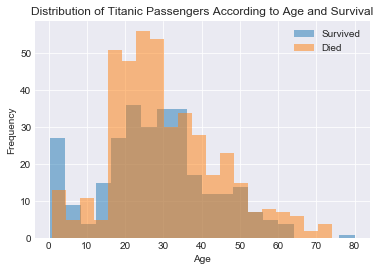

In [39]:
ax = survived['Age'].hist(bins=20, alpha=0.5, label='Survived')

died['Age'].hist(ax=ax, bins=20, alpha=0.5, label='Died')

ax.set_title('Distribution of Titanic Passengers According to Age and Survival')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend();

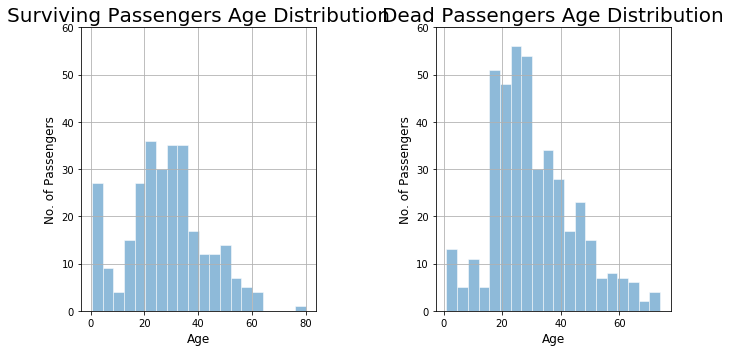

In [27]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(1,2,1)

survived['Age'].hist(ax=ax, bins=20, edgecolor='w', figsize=(10, 5), alpha=0.5)
ax.set_title('Surviving Passengers Age Distribution', fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('No. of Passengers', fontsize=12)
ax.set_ylim([0, 60])

ax2 = fig.add_subplot(1,2,2)

died['Age'].hist(ax=ax2, bins=20, edgecolor='w', figsize=(10, 5), alpha=0.5)
ax2.set_title('Dead Passengers Age Distribution', fontsize=20)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('No. of Passengers', fontsize=12)
ax2.set_ylim([0, 60])

plt.tight_layout()

In [29]:
# What about the gender of the passengers? How many survived per gender?

bygender = titanic.groupby('Survived')['Sex'].value_counts().unstack()
bygender


Sex,female,male
Survived,,
0,81,468
1,233,109


In [30]:
male = bygender['male']
female = bygender['female']

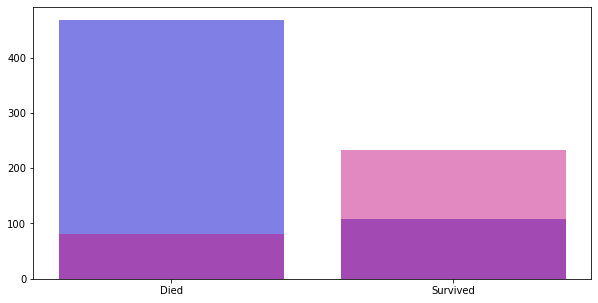

In [36]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male, color='mediumblue', alpha=0.5)
ax.bar(female.index, female, color='mediumvioletred', alpha=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived']);

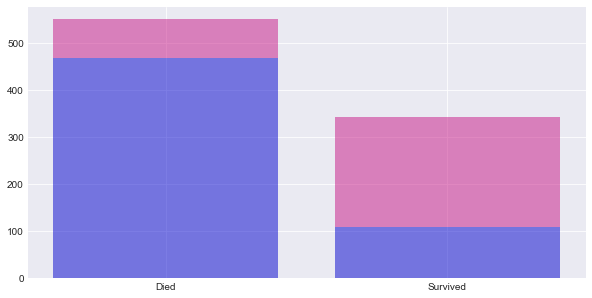

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male, color='mediumblue', alpha=0.5)
ax.bar(female.index, female, bottom=male, color='mediumvioletred', alpha=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived']);

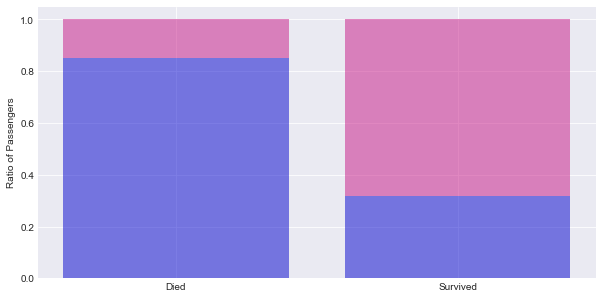

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male/(male+female), color='mediumblue', alpha=0.5)
ax.bar(female.index, female/(male+female), bottom=male/(male+female), color='mediumvioletred', alpha=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived'])
ax.set_ylabel('Ratio of Passengers');

In [21]:
byclass = titanic.groupby('Survived')['Pclass'].value_counts().unstack()
byclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


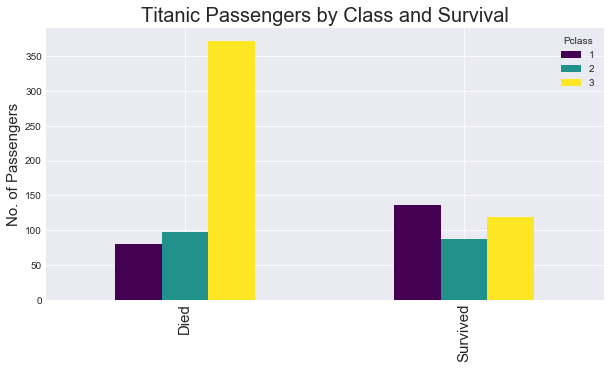

In [22]:
ax = byclass.plot(kind='bar', figsize=(10, 5), cmap=plt.cm.viridis)

ax.set_title('Titanic Passengers by Class and Survival', fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('No. of Passengers', fontsize=15);

In [23]:
byclass.T 

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [24]:
byclass.T / byclass.sum(axis=1)

Survived,0,1
Pclass,,
1,0.145719,0.397661
2,0.176685,0.254386
3,0.677596,0.347953


In [25]:
(byclass.T / byclass.sum(axis=1)).sum()

Survived
0    1.0
1    1.0
dtype: float64

Text(0, 0.5, 'No. of Passengers')

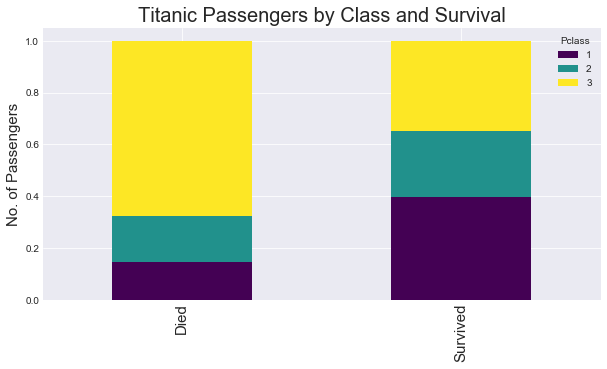

In [26]:
data = byclass.T / byclass.sum(axis=1)
ax = data.T.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=plt.cm.viridis)

ax.set_title('Titanic Passengers by Class and Survival', fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('No. of Passengers', fontsize=15)

To Sash: This one's optional -- It's kind of stupid but we can use this as a sample to show outliers. Since there's an insane price of over $500

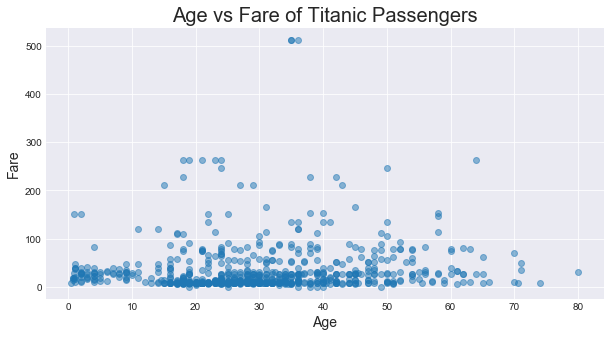

In [27]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.plot(titanic['Age'], titanic['Fare'], 'o', alpha=0.5)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Fare', fontsize=14)
ax.set_title('Age vs Fare of Titanic Passengers', fontsize=20);